<a href="https://colab.research.google.com/github/RafaGusmao/DataScience/blob/main/Airbnb_Data_Analysis_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Airbnb Data Analysis - *Dublin*

O [Airbnb](https://www.airbnb.com.br/) is already considered to be the largest hotel company today. Oh, the detail is that he doesn't own any hotel!

Connecting people who want to travel (and stay) with hosts who want to rent their properties in a practical way, Airbnb provides an innovative platform to make this hosting an alternative.

At the end of 2018, the Startup founded 10 years ago, had already hosted more than 300 million people around the world, challenging traditional hotel chains.

One of Airbnb's initiatives is to make website data available for some of the main cities in the world. Through the Inside Airbnb portal, it is possible to download a large amount of data to develop Data Science projects and solutions.

Analyzing Airbnb
In this notebook, we will analyze the data regarding the city of Dublin, and see what insights can be extracted from the raw data.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**In this *notebook*, we will analyze data relating to the city of Dublin, and see what insights can be extracted from raw data.**

## Data Obtainment


In [ ]:
#import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# import the listings.csv file into a DataFrame
df = pd.read_csv("/content/sample_data/listings.csv")

## Data analysis



**Dictionary of variables**

* id - id number generated to identify the property
* name - name of the advertised property
* host_id - id number of the property owner (host)
* host_name - Host name
* neighborhood_group - this column does not contain any valid values
* neighborhood - name of the neighborhood
* latitude - latitude coordinate of the property
* longitude - property longitude coordinate
* room_type - informs the type of room that is offered
* price - price to rent the property
* minimum_nights - minimum number of nights to book
* number_of_reviews - number of reviews the property has
* last_review - date of last review
* reviews_per_month - number of reviews per month
* calculated_host_listings_count - number of properties from the same host
* availability_365 - number of days of availability within 365 days
* number_of_reviews_ltm - number of reviews
* license - License

Before starting any analysis, let's check the face of our dataset, analyzing the first 5 entries.

In [ ]:
# show the first 5 entries
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,72,3,326,2024-03-18,2.06,2,129,50,NaN
1,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,71,3,292,2024-03-18,1.87,2,45,56,NaN
2,159889,Friendly Single Room,766611,Marie,NaN,Dublin City,53.39027,-6.23547,Private room,52,2,421,2024-03-20,2.88,3,282,47,NaN
3,162809,5.5 miles south of Dublin City :^),777681,Robbie,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,85,1,377,2024-03-15,3.51,2,81,43,NaN
4,165828,Pádraig Pearse apt. Kilmainham,790601,Timothy,NaN,Dublin City,53.33744,-6.32363,Entire home/apt,188,3,76,2023-12-28,0.50,4,222,3,NaN


### **Q1. How many attributes (variables) and how many inputs does our dataset have? What are the types of variables?**

The DataFrame is made up of 4734 rows and 18 columns, each one being specified with its type described below.

In [ ]:
# identify the data volume of the DataFrame
lines = df.shape[0]
columns = df.shape[1]

print(f'linhas: {lines} Colunas:{columns}')

# check the type of the first 5 entries of the dataset
display(df.dtypes)

linhas: 4734 Colunas:18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. What is the percentage of missing values ​​in the *dataset*?**


License and neighborhood group values ​​are 100% missing, assessments per month and last assessment have 18% missing values. The other data has 0% missing values.

In [ ]:
# sort variables by their missing values ​​in descending order
(df.isnull().sum()/lines*100).sort_values(ascending=False)

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  18.060837
last_review                        18.060837
minimum_nights                      0.000000
number_of_reviews_ltm               0.000000
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
id                                  0.000000
name                                0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
price                               0.000000
dtype: float64

### **Q3. What is the type of distribution of the variables?**



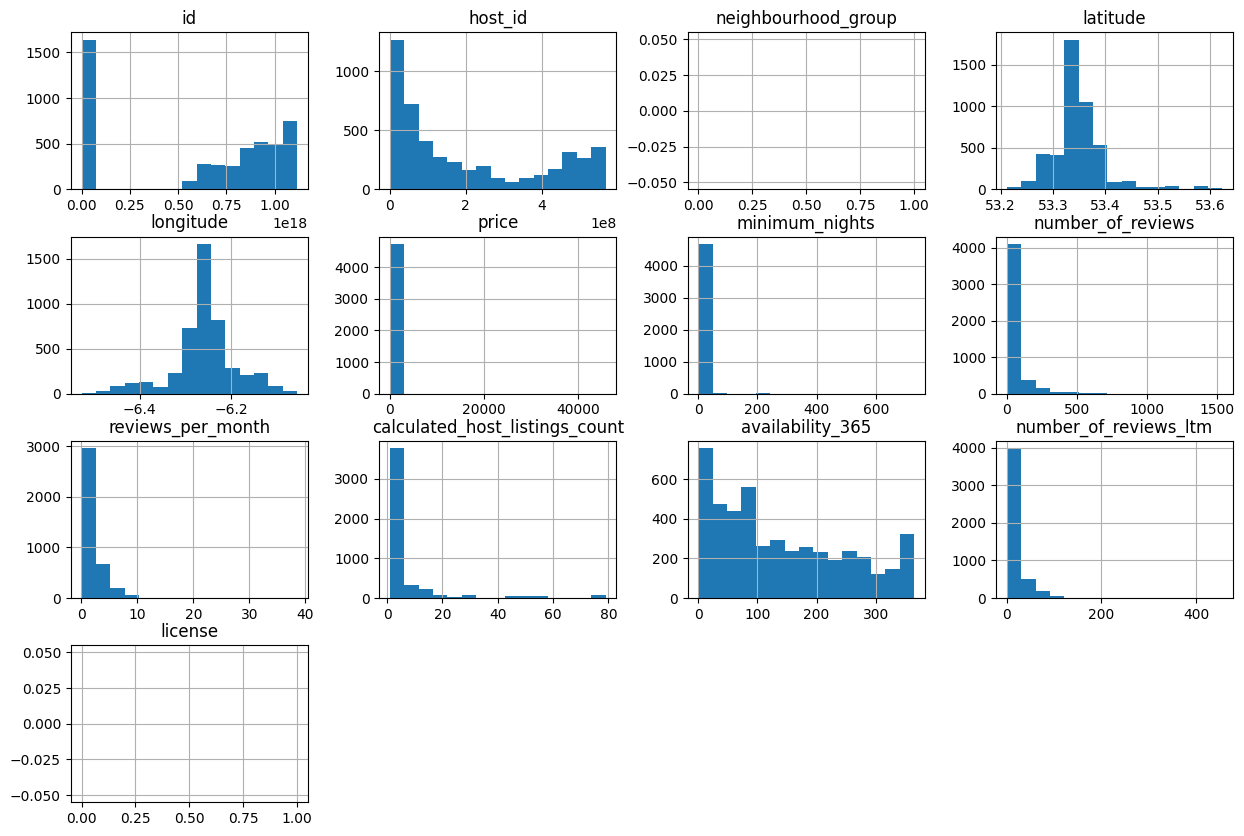

In [ ]:
# plot the histogram of numeric variables
df.hist(bins=15, figsize=(15,10));


### **Q4. What is the average rental price?**

The average daily rate in Dublin is around US$194.51 per day.

In [ ]:
# see the average of the `price`` column
df['price'].mean()

194.51373046049852

### **Q4. What is the correlation between the variables**

In [ ]:
# create a correlation matrix
corr = df[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]].corr()

# show the correlation matrix
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.000187,-0.028681,-0.118438,-0.009402,0.053215
minimum_nights,0.000187,1.000000,-0.046382,-0.109366,0.061803,0.075114
number_of_reviews,-0.028681,-0.046382,1.000000,0.589402,-0.052600,-0.027597
reviews_per_month,-0.118438,-0.109366,0.589402,1.000000,-0.088942,-0.036602
calculated_host_listings_count,-0.009402,0.061803,-0.052600,-0.088942,1.000000,0.104989
availability_365,0.053215,0.075114,-0.027597,-0.036602,0.104989,1.000000


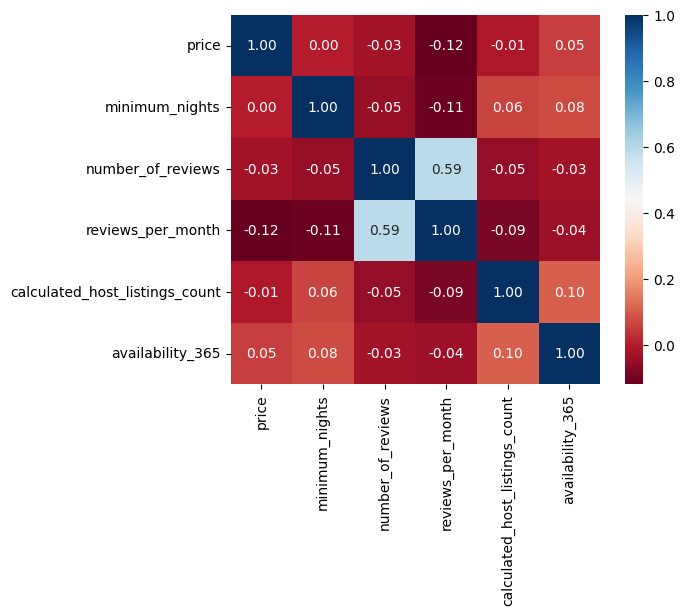

In [ ]:
# plot a heatmap from the correlations
sns.heatmap(corr, cmap='RdBu', fmt= '.2f', square=True, linecolor='White', annot=True);

### **Q5. What type of property is most rented on Airbnb?**

the most allocated type of property is Entire home/apart, with 2554 rentals. 53% of the rental data.

In [ ]:
# show the quantity of each type of property available
df['room_type'].value_counts()

room_type
Entire home/apt    2554
Private room       2039
Shared room         133
Hotel room            8
Name: count, dtype: int64

In [ ]:
# show the percentage of each type of property available
df['room_type'].value_counts() / df.shape[0]*100

room_type
Entire home/apt    53.950148
Private room       43.071398
Shared room         2.809463
Hotel room          0.168990
Name: count, dtype: float64

### **Q6. What is the most expensive location in the dataset?**

The most expensive location in Dublin is 'South Dublin', at US$266.45 per night.

In [ ]:
# see prices by neighborhoods, on average
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
South Dublin             266.458204
Dn Laoghaire-Rathdown    203.469388
Dublin City              187.538225
Fingal                   185.821138
Name: price, dtype: float64

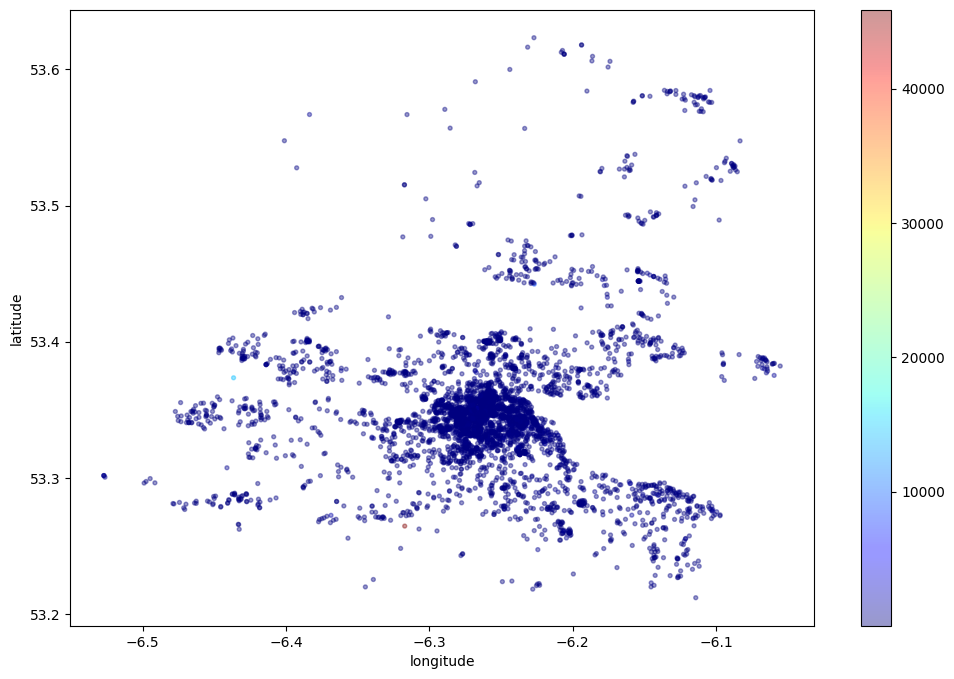

In [ ]:
# plot properties by latitude-longitude
df.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. What is the average minimum nights for rental (minimum_nights)?**

In the city of Dublin, the average minimum number of nights for rental is 5 nights.

In [ ]:
# see the average of the `minimum_nights`` column
df['minimum_nights'].mean()

5.680608365019012

## Conclusions


Only a superficial analysis was carried out on the Airbnb database, but it was already noticed that there are *outliers* in some of the variables.

It was also noted that in some locations there are few properties available, which can distort statistical information on some attributes.

Finally, remember that this *dataset* is a summarized version, ideal only for an initial approach. It is recommended that the complete data set, with 106 available attributes, be used in a future exploratory analysis.